In [1]:
import numpy as np
import matplotlib.pyplot as plt
from argparse import Namespace

In [2]:
raw = np.genfromtxt('Resonance02.txt')

I = []
F = []
Q = []

for i in raw:
    F.append(i[0])
    I.append(i[1])
    Q.append(i[2])
    
x = np.array(F)
Q = np.array(Q)
I = np.array(I)
    
s21 = np.sqrt(I**2 + Q**2)

ye = np.ones_like(s21)*0.001

data = Namespace(x=F, y=s21, ye=ye)

Text(0, 0.5, 'y')

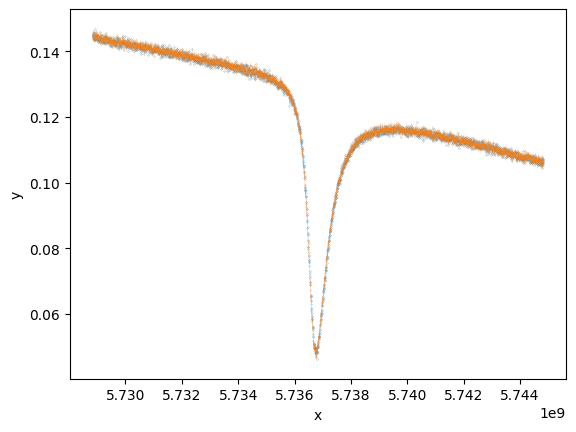

In [3]:
plt.scatter(data.x, data.y, marker='.', s=0.1)
plt.fill_between(data.x, data.y-data.ye, data.y+data.ye, alpha=1)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
from iminuit import Minuit, cost

def retta(x, m, q):
    return m*x + q

def resonance(x, x0, Q, Q_c, phi0):
    num = np.exp(1j*phi0)
    den = 1 + 2*1j*Q*(x-x0)/x0
    return abs(1 - (Q/Q_c)*(num/den))

def model(x,m,q,x0,Q,Q_c,phi0):
    return retta(x,m,q)*resonance(x,x0,Q,Q_c,phi0)

def FWHM(x,y):
    half = max(y) / 2.
    minori = x[np.where(y < half)]
    index1 = min(minori)
    index2 = max(minori)
    return index2 - index1

In [5]:
data.x = np.array(data.x)
data.y = np.array(data.y)
width = FWHM(data.x,data.y)
stima_x0 = float(data.x[np.where(data.y == min(data.y))])
stima_Q = stima_x0/(2*width)
stima_m = (data.y[0]-data.y[-1])/(data.x[0]-data.x[-1])
stima_q = data.y[0] - stima_m * data.x[0]
stima_Q_c = 8000
stima_phi0 = 0.2

C:\Users\ricca\AppData\Local\Temp\ipykernel_9212\93024387.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stima_x0 = float(data.x[np.where(data.y == min(data.y))])


In [6]:
lsq = cost.LeastSquares(data.x, data.y, data.ye, model)

m = Minuit(lsq, m=stima_m,q=stima_q,x0=stima_x0,Q=stima_Q,Q_c=stima_Q_c,phi0=stima_phi0)
m

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,m,-2.379e-9,0.024e-9,,,,,
1,q,13.78,0.14,,,,,
2,x0,5.74e9,0.06e9,,,,,
3,Q,4.95e3,0.05e3,,,,,
4,Q_c,8.00e3,0.08e3,,,,,
5,phi0,0.200,0.002,,,,,


In [7]:
m.migrad(ncall=10000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4723 (χ²/ndof = 1.2)       │              Nfcn = 233              │
│ EDM = 8.47e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │ -2.181e-9 │ 0.004e-9  │            │            │         │         │       │
│ 1 │ q    │  12.640   │   0.024   │            │            │         │         │       │
│ 2 │ x0   │5.7366746e9│0.0000010e9│            │            │         │         │       │
│ 3 │ Q    │  6.062e3  │  0.012e3  │            │            │         │         │       │
│ 4 │ Q_c  │  9.286e3  │  0.016e3  │            │            │         │         │       │
│ 5 │ phi0 │  0.3003   │  0.0015   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│      │                     m                     q                    x0                     Q                   Q_c                  phi0 │
├──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    m │              1.71e-23     -98.133979571e-15 -1.743845396685107e-9   -4.063855564890e-12   -8.786808224155e-12       3.256013453e-15 │
│    q │     -98.133979571e-15              0.000563               10.0073               23.2e-3               50.3e-3              -18.7e-6 │
│   x0 │ -1.743845396685107e-9               10.0073              9.74e+05               -0.70e3               -0.02e3            -1.2272587 │
│    Q │   -4.063855564890e-12               23.2e-3               -0.70e3                   140                0.12e3              653.4e-6 │
│  Q_c │   -8.786808224155e-12               50.3e-3               -0.02e3                0.12e3                   242             1.3779e-3 │
│ phi0 │       3.256013453e-15              -18.7e-6            -1.2272587              653.4e-6             1.3779e-3              2.25e-06 │
└──────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Text(0, 0.5, 'y')

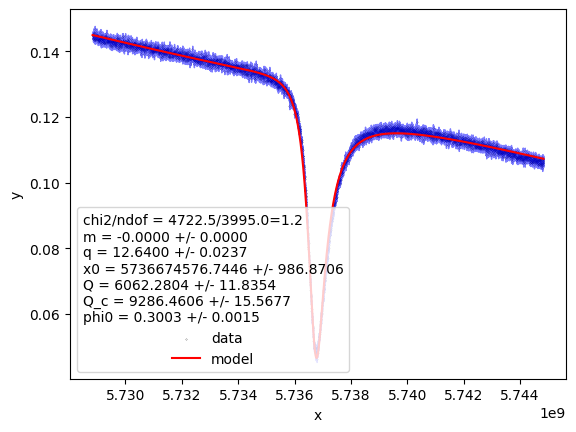

In [8]:
plt.scatter(data.x, data.y, marker='.', s=0.1, label='data', color='black')
plt.plot(data.x, model(data.x, *m.values[:]), label='model', color='red')
plt.fill_between(data.x, data.y-data.ye, data.y+data.ye, alpha=0.5, color='blue')

chi2 = m.fval
ndof = m.ndof

title = [
    f"chi2/ndof = {chi2:.1f}/{ndof}={chi2/ndof:.1f}",
]

for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.4f} +/- {m.errors[par]:.4f}"
    )
    
plt.legend(title="\n".join(title))
plt.xlabel("x")
plt.ylabel("y")

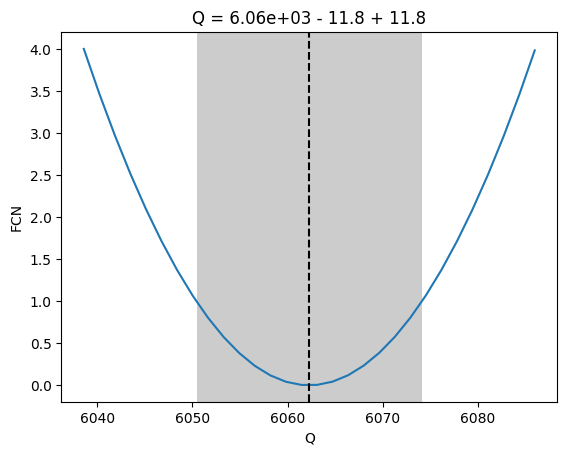

In [9]:
m.draw_mnprofile('Q');

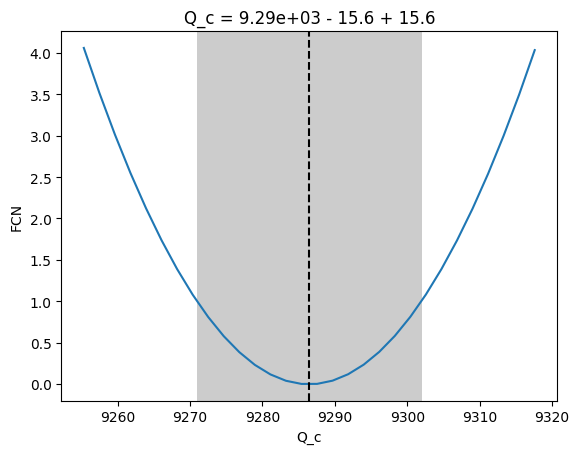

In [10]:
m.draw_mnprofile('Q_c');

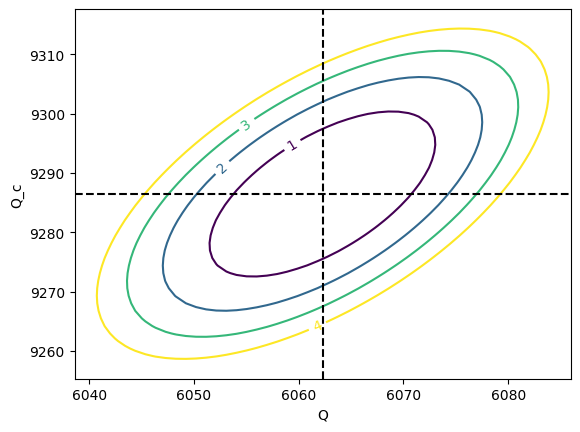

In [15]:
m.draw_contour('Q','Q_c');

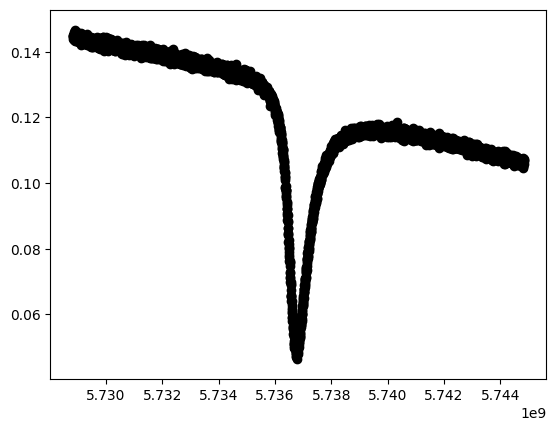

In [18]:
import jacobi

lsq.visualize(m.values)

y, ycov = jacobi.propagate(lambda p: model(x, *p), m.values, m.covariance)
ye = np.diag(ycov) ** 0.5

plt.fill_between(x, y-ye, y+ye, alpha=0.5)

In [20]:
m_hesse = Minuit(lsq, m=stima_m,q=stima_q,x0=stima_x0,Q=stima_Q,Q_c=stima_Q_c,phi0=stima_phi0)

In [25]:
m_hesse.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                               External                                  │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.527e+04 (χ²/ndof = 8.8)  │              Nfcn = 195              │
│ EDM = 2.83e+04 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │-2.37928e-9│0.00004e-9 │            │            │         │         │       │
│ 1 │ q    │ 13.77528  │  0.00024  │            │            │         │         │       │
│ 2 │ x0   │5.7367842e9│0.0000011e9│            │            │         │         │       │
│ 3 │ Q    │  4.946e3  │  0.009e3  │            │            │         │         │       │
│ 4 │ Q_c  │  8.000e3  │  0.011e3  │            │            │         │         │       │
│ 5 │ phi0 │  0.2000   │  0.0013   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│      │                     m                     q                    x0                     Q                   Q_c                  phi0 │
├──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    m │              1.82e-27    -10.3914044005e-18 343.6752780828814e-15  -9.2110941278893e-15 -11.2670367921765e-15      -340.3415727e-21 │
│    q │    -10.3914044005e-18              5.98e-08            2.68706e-3             -15.53e-6             -15.37e-6                    -0 │
│   x0 │ 343.6752780828814e-15            2.68706e-3               1.2e+06               -3.33e3               -1.47e3            -1.1258137 │
│    Q │  -9.2110941278893e-15             -15.53e-6               -3.33e3                  83.7                    60             2.1945e-3 │
│  Q_c │ -11.2670367921765e-15             -15.37e-6               -1.47e3                    60                   120             2.2640e-3 │
│ phi0 │      -340.3415727e-21                    -0            -1.1258137             2.1945e-3             2.2640e-3              1.68e-06 │
└──────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

Text(0, 0.5, 'y')

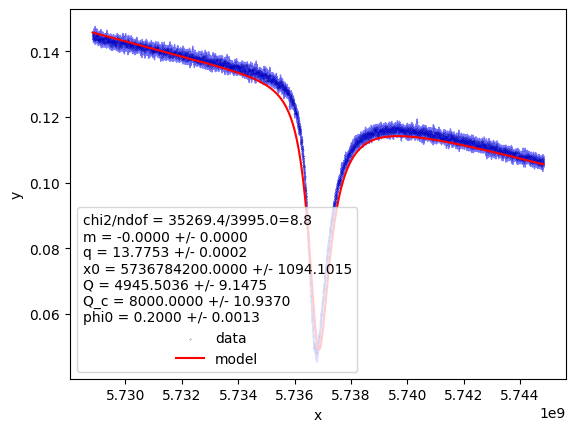

In [26]:
plt.scatter(data.x, data.y, marker='.', s=0.1, label='data', color='black')
plt.plot(data.x, model(data.x, *m_hesse.values[:]), label='model', color='red')
plt.fill_between(data.x, data.y-data.ye, data.y+data.ye, alpha=0.5, color='blue')

chi2 = m_hesse.fval
ndof = m_hesse.ndof

title = [
    f"chi2/ndof = {chi2:.1f}/{ndof}={chi2/ndof:.1f}",
]

for par in m_hesse.parameters:
    title.append(
        f"{par} = {m_hesse.values[par]:.4f} +/- {m_hesse.errors[par]:.4f}"
    )
    
plt.legend(title="\n".join(title))
plt.xlabel("x")
plt.ylabel("y")